<a href="https://colab.research.google.com/github/bdfd/00Project04_Avacado_Price_Analysis/blob/main/Avocado_Price_Sale_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import numpy as np
import pandas as pd

In [2]:
path = 'https://raw.githubusercontent.com/bdfd/Project04_Avacado_Price_Analysis-Kaggle/main/dataset/Avocado.csv'
df = pd.read_csv(path)
df.head(3)
df = df.copy()[df['type'] == 'organic']

In [3]:
df.tail(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [4]:
df["AveragePrice"].head(5)

9126    1.83
9127    1.89
9128    1.85
9129    1.84
9130    1.94
Name: AveragePrice, dtype: float64

In [5]:
df['Date'] = pd.to_datetime(df["Date"])

In [6]:
albany_df = df.copy()
albany_df = df[ df['region'] == 'Albany' ]
albany_df.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9126,0,2015-12-27,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.0,0.0,organic,2015,Albany
9127,1,2015-12-20,1.89,1163.03,30.24,172.14,0.0,960.65,960.65,0.0,0.0,organic,2015,Albany
9128,2,2015-12-13,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.0,0.0,organic,2015,Albany


In [7]:
# albany_df = albany_df.set_index("Date")
# serve as same function below
albany_df.set_index("Date", inplace=True)

In [8]:
albany_df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.00,0.0,organic,2015,Albany
2015-12-20,1,1.89,1163.03,30.24,172.14,0.0,960.65,960.65,0.00,0.0,organic,2015,Albany
2015-12-13,2,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.00,0.0,organic,2015,Albany
2015-12-06,3,1.84,1158.42,90.29,104.18,0.0,963.95,948.52,15.43,0.0,organic,2015,Albany
2015-11-29,4,1.94,831.69,0.00,94.73,0.0,736.96,736.96,0.00,0.0,organic,2015,Albany


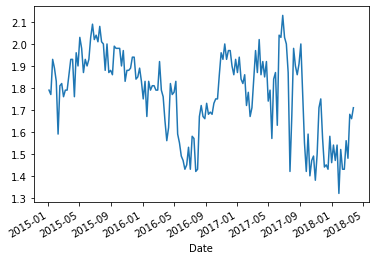

In [9]:
albany_df['AveragePrice'].plot()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:6402: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,


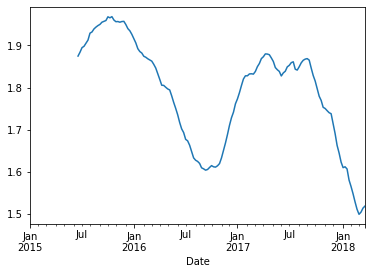

In [10]:
#other method for sort columns by using sort_values
#df.sort_values(by='Date', ascending=False, inplace=True)
albany_df.sort_index(inplace = True)
albany_df['AveragePrice'].rolling(25).mean().plot()

In [11]:
albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
albany_df.head(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-01-04,51,1.79,1373.95,57.42,153.88,0.0,1162.65,1162.65,0.0,0.0,organic,2015,Albany,NaN
2015-01-11,50,1.77,1182.56,39.00,305.12,0.0,838.44,838.44,0.0,0.0,organic,2015,Albany,NaN
2015-01-18,49,1.93,1118.47,8.02,178.78,0.0,931.67,931.67,0.0,0.0,organic,2015,Albany,NaN


In [13]:
albany_df.tail(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2018-03-11,2,1.68,2570.52,131.67,229.56,0.0,2209.29,2209.29,0.00,0.0,organic,2018,Albany,1.5044
2018-03-18,1,1.66,3154.45,275.89,297.96,0.0,2580.60,2577.27,3.33,0.0,organic,2018,Albany,1.5140
2018-03-25,0,1.71,2321.82,42.95,272.41,0.0,2006.46,1996.46,10.00,0.0,organic,2018,Albany,1.5188


In [14]:
#This function currently drop any null value but not replace in albany_df since we did not apply inplace=True in the function
albany_df.dropna().head(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-06-21,27,2.09,1053.73,17.59,107.87,0.0,928.27,928.27,0.0,0.0,organic,2015,Albany,1.8748
2015-06-28,26,2.02,1200.61,22.35,124.70,0.0,1053.56,1053.56,0.0,0.0,organic,2015,Albany,1.8840
2015-07-05,25,2.04,1573.19,50.69,183.90,0.0,1338.60,1338.60,0.0,0.0,organic,2015,Albany,1.8948


In [15]:
df['region'].values

array(['Albany', 'Albany', 'Albany', ..., 'WestTexNewMexico',
       'WestTexNewMexico', 'WestTexNewMexico'], dtype=object)

In [16]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [17]:
graph_df = pd.DataFrame()

for region in df['region'].unique():
  print(region)
  region_df = df.copy()[df['region']==region]
  region_df.set_index('Date',inplace=True)
  region_df.sort_index(inplace=True)
  region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
  
  if graph_df.empty:
    graph_df = region_df[[f'{region}_price25ma']]
  else:
    graph_df = graph_df.join(region_df[f'{region}_price25ma'])

Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes
HarrisburgScranton
HartfordSpringfield
Houston
Indianapolis
Jacksonville
LasVegas
LosAngeles
Louisville
MiamiFtLauderdale
Midsouth
Nashville
NewOrleansMobile
NewYork
Northeast
NorthernNewEngland
Orlando
Philadelphia
PhoenixTucson
Pittsburgh
Plains
Portland
RaleighGreensboro
RichmondNorfolk
Roanoke
Sacramento
SanDiego
SanFrancisco
Seattle
SouthCarolina
SouthCentral
Southeast
Spokane
StLouis
Syracuse
Tampa
TotalUS
West
WestTexNewMexico


In [18]:
graph_df.tail()

,Albany_price25ma,Atlanta_price25ma,BaltimoreWashington_price25ma,Boise_price25ma,Boston_price25ma,BuffaloRochester_price25ma,California_price25ma,Charlotte_price25ma,Chicago_price25ma,CincinnatiDayton_price25ma,...,SouthCarolina_price25ma,SouthCentral_price25ma,Southeast_price25ma,Spokane_price25ma,StLouis_price25ma,Syracuse_price25ma,Tampa_price25ma,TotalUS_price25ma,West_price25ma,WestTexNewMexico_price25ma
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.5112,1.8660,1.5836,2.0512,1.7636,1.2912,1.9128,2.0548,1.8160,1.7752,...,1.6184,1.5728,1.7116,2.1544,1.9240,1.3156,1.7204,1.7144,1.8620,1.8708
2018-03-04,1.4992,1.8288,1.5772,2.0176,1.7708,1.2744,1.8876,2.0180,1.8024,1.7564,...,1.5952,1.5592,1.6868,2.1040,1.8868,1.3004,1.7104,1.6940,1.8220,1.8372
2018-03-11,1.5044,1.7844,1.5732,1.9836,1.7824,1.2652,1.8636,1.9764,1.7836,1.7216,...,1.5612,1.5400,1.6484,2.0552,1.8468,1.2932,1.6916,1.6748,1.7912,1.8052
2018-03-18,1.5140,1.7412,1.5684,1.9520,1.7932,1.2560,1.8516,1.9444,1.7732,1.6860,...,1.5312,1.5204,1.6156,2.0012,1.8192,1.2848,1.6776,1.6588,1.7644,1.7772
2018-03-25,1.5188,1.6936,1.5568,1.9128,1.7984,1.2416,1.8364,1.9024,1.7672,1.6720,...,1.5004,1.5072,1.5820,1.9496,1.7976,1.2700,1.6484,1.6428,1.7304,1.7472


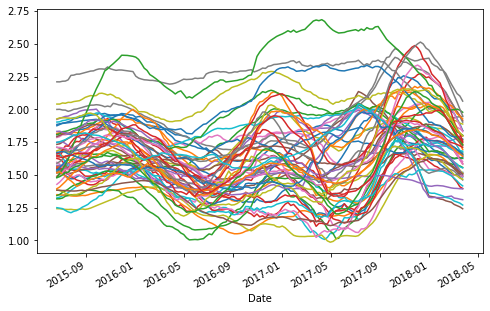

In [25]:
graph_df.dropna().plot(figsize=(8,5), legend=False)